In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

In [2]:
df = pd.read_csv('../data/survey.csv')
print(df.shape)
df.head(15)

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [3]:
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})

In [4]:
df = pd.get_dummies(data = df, columns = ['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first = True)
df.shape

(2111, 24)

In [5]:
# Train test split
X = df.drop(columns = ['NObeyesdad', 'Weight'])
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
# Pipelines
def pipe_model(model):
    pipe = Pipeline([
        ('ss', StandardScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {pipe.score(X_train, y_train)}')
    print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')
    return print('='*40)

In [7]:
pipe_model(LinearRegression())
pipe_model(KNeighborsRegressor())
pipe_model(DecisionTreeRegressor())
pipe_model(BaggingRegressor())
pipe_model(RandomForestRegressor())
pipe_model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.583058887606605
Testing r2 score: 0.5776341443290094
Testing MSE: 298.905998367195
KNeighborsRegressor()
Training r2 score: 0.9112589623119534
Testing r2 score: 0.8092018277048589
Testing MSE: 135.02681954703345
DecisionTreeRegressor()
Training r2 score: 1.0
Testing r2 score: 0.7361159275934601
Testing MSE: 186.74931000416916
BaggingRegressor()
Training r2 score: 0.9811978811687787
Testing r2 score: 0.8471556570535224
Testing MSE: 108.16710278489663
RandomForestRegressor()
Training r2 score: 0.9864519349227345
Testing r2 score: 0.8591381437657225
Testing MSE: 99.68716269139193
AdaBoostRegressor()
Training r2 score: 0.7256750256636266
Testing r2 score: 0.6682036890037752
Testing MSE: 234.8104285923475


In [8]:
# Read Data
df = pd.read_csv('../data/survey.csv')

# Binarize columns
df['family_history_with_overweight'] = df['family_history_with_overweight'].map({'yes':1, 'no':0})
df['FAVC'] = df['FAVC'].map({'yes':1, 'no':0})
df['SMOKE'] = df['SMOKE'].map({'yes':1, 'no':0})
df['SCC'] = df['SCC'].map({'yes':1, 'no':0})

# Get dummies
df = pd.get_dummies(data = df, columns = ['Gender', 'CAEC', 'CALC', 'MTRANS'], drop_first = True)


In [9]:
# Create polynomial features
poly = PolynomialFeatures(2, interaction_only = True, include_bias = False)
array_poly = poly.fit_transform(df[['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']])

# Polynomial Feature Dataframe
df_poly = pd.DataFrame(array_poly, columns = poly.get_feature_names_out(['Height', 'FAVC', 'FCVC', 'NCP', 'CH2O']))

# Merge Polynomial Features df
df = df.merge(df_poly.iloc[:,4:])

# Create height^2 column
df['h2'] = df['Height'] ** 2

In [10]:
X = df.drop(columns = ['NObeyesdad', 'Weight'])
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [11]:
pipe = Pipeline([
        ('ss', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)
print(f'Training r2 score: {pipe.score(X_train, y_train)}')
print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')

Training r2 score: 0.9998750217056381
Testing r2 score: 0.9988068759229235
Testing MSE: 0.4043362484286165


In [12]:
pipe_model(LinearRegression())
pipe_model(KNeighborsRegressor())
pipe_model(DecisionTreeRegressor())
pipe_model(BaggingRegressor())
pipe_model(RandomForestRegressor())
pipe_model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.45739703413278354
Testing r2 score: 0.4622618842899554
Testing MSE: 182.23336241443053
KNeighborsRegressor()
Training r2 score: 0.9965571998665544
Testing r2 score: 0.9946640493554747
Testing MSE: 1.8082932922568316
DecisionTreeRegressor()
Training r2 score: 1.0
Testing r2 score: 0.9985220214803501
Testing MSE: 0.5008701956276146
BaggingRegressor()
Training r2 score: 0.9997801721948145
Testing r2 score: 0.9985532887032793
Testing MSE: 0.49027408759417396
RandomForestRegressor()
Training r2 score: 0.9998559437872439
Testing r2 score: 0.998858417451568
Testing MSE: 0.38686940761063787
AdaBoostRegressor()
Training r2 score: 0.5345291295575235
Testing r2 score: 0.5296480376210766
Testing MSE: 159.39695758660883


In [13]:
pipe = Pipeline([
        ('ss', StandardScaler()),
        ('rf', RandomForestRegressor())
    ])
pipe.fit(X_train, y_train)
print(f'Training r2 score: {pipe.score(X_train, y_train)}')
print(f'Testing r2 score: {pipe.score(X_test, y_test)}')
print(f'Testing MSE: {metrics.mean_squared_error(y_test, pipe.predict(X_test))}')

Training r2 score: 0.9998686957343143
Testing r2 score: 0.9988119037890412
Testing MSE: 0.4026323614962388


In [17]:
# Removing from pipeline to get feature importances
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train)
rf.feature_importances_

array([1.85335619e-01, 6.56124842e-02, 9.08253804e-02, 1.05817217e-02,
       8.29035528e-02, 3.98163142e-02, 4.31772300e-03, 2.66231008e-02,
       7.05372962e-03, 7.53911646e-02, 5.03237815e-02, 1.74328456e-01,
       6.96050115e-03, 2.38072597e-02, 1.34638176e-04, 2.32841342e-03,
       2.31285459e-02, 5.68741500e-03, 1.23105714e-04, 5.07151106e-04,
       4.19914605e-02, 1.46312108e-03, 1.88101380e-05, 3.05603037e-04,
       5.58538190e-05, 6.15827617e-03, 1.61090689e-05, 6.78694925e-06,
       1.66953617e-04, 2.97083783e-05, 1.61937695e-03, 3.46781386e-05,
       7.23432044e-02])

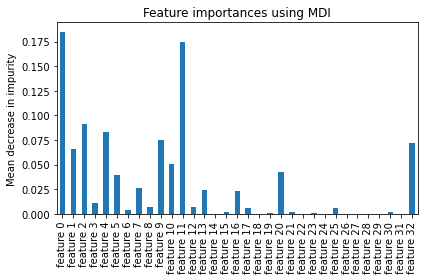

In [24]:
# From sklearn https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
feature_names = [f"feature {i}" for i in range(X.shape[1])]
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()